# 交叉验证

## 基本概念

**交叉验证**是一种通过将数据集划分为多个子集，并在这些子集上重复训练和验证模型，以提升模型泛化性能的模型训练技术

## 交叉验证示意图

**交叉验证**将数据集分成K个大小相等（或尽可能相等）的子集，每次使用其中的一个子集作为验证集，而剩下的K-1个子集作为训练集。这个过程重复K次，每次选择不同的子集作为验证集，最终得到K个模型性能评估结果，并计算这些结果的平均值作为最终的模型评估结果。

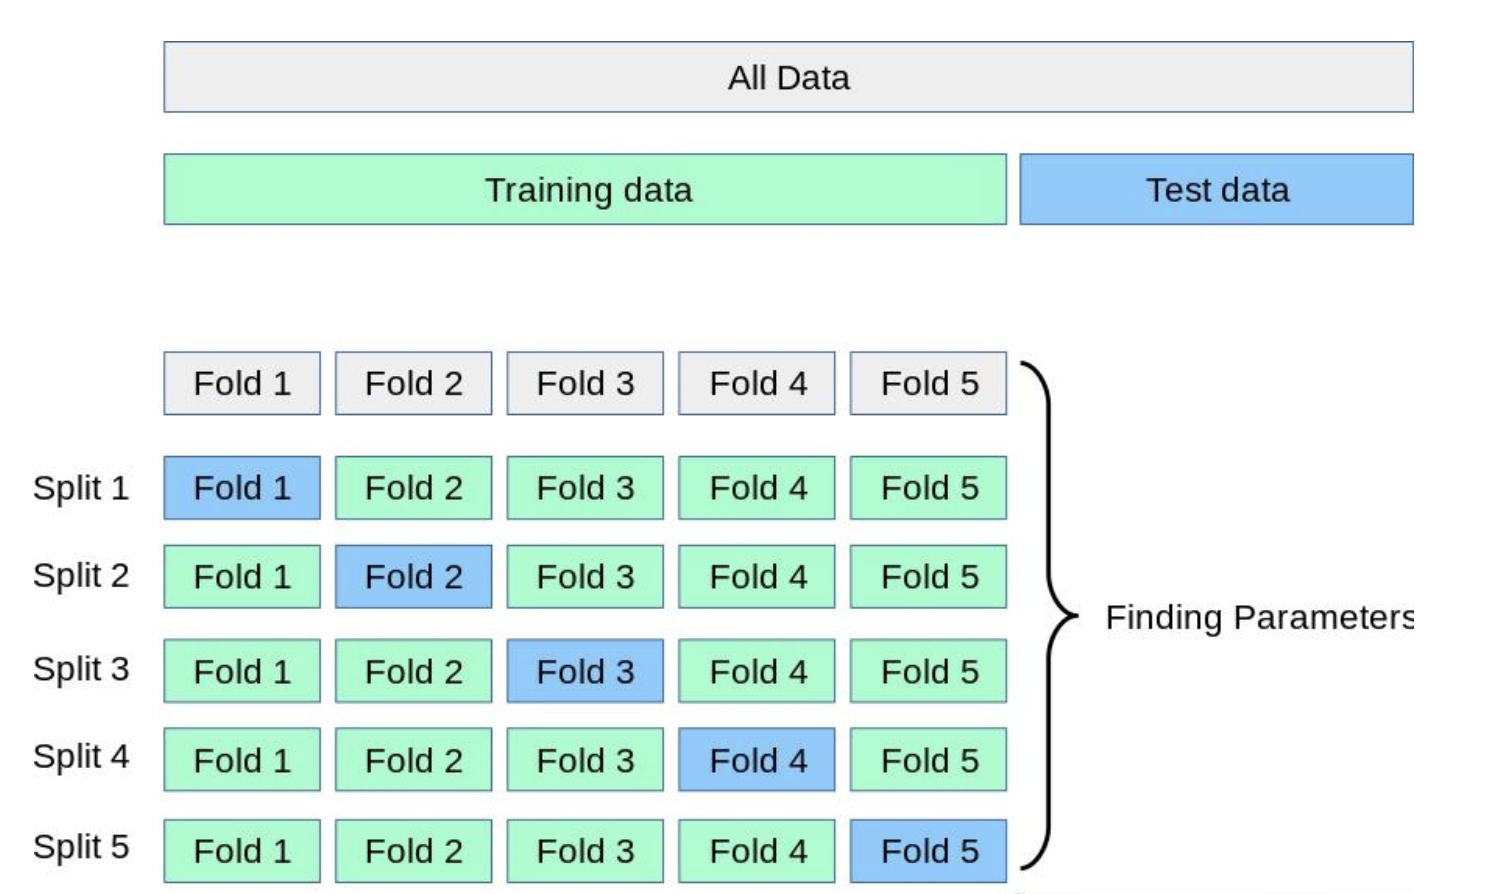

In [1]:
# 交叉验证展示
from IPython.display import Image
Image(filename='./pcitures/raw_pics/C04 机器学习——交叉验证与KFold、StratifiedKFold.png', width=600, height=400)

## 交叉验证相比于train_test_split的优点

train_test_split和交叉验证都属于模型评估的常用技术，但是交叉验证相比于train_test_split有明显优势。

### 更高的评估稳定性和可靠性
- **train_test_split**：通过将数据集随机划分为一个训练集和一个验证集，可能会导致评估结果受到某一轮划分的影响。如果恰巧验证集划分较为特殊，那么模型的评估将可能不准确，不能真实反映模型的性能。
- **交叉验证**：通过在多个不同的数据子集上进行训练和验证，交叉验证减少了模型评估对单一划分的依赖，提供了更为稳健的评估结果。模型的性能是在多个不同的训练集和验证集上评估的，因此能够更全面地反映模型的泛化能力。

### 充分利用数据
- **train_test_split**：通常会将数据划分为训练集和验证集，验证集所占比例可能是 20% 或 30%，这意味着在验证集上进行评估时，验证集部分数据并没有用于模型训练，导致数据浪费。
- **交叉验证**：每次迭代时，都会用不同的训练集和验证集进行训练和评估，模型在每个数据点上都得到了训练和验证。这使得交叉验证能够更有效地利用每一条数据，同时给每一条数据都提供了作为验证数据的机会。这在小数据集上尤为重要。

### 减少过拟合的风险
- **train_test_split**：如果训练集的大小非常大，而验证集很小，模型可能会在训练集上过拟合（即模型对训练数据记忆过多，无法泛化）。这种情况下，模型在验证集上可能无法表现良好。
- **交叉验证**：由于每个子集都会作为一次验证集，交叉验证通过使用不同的子集进行评估，使得模型更好地适应不同的数据分布，减小了过拟合的风险。

# 代码实现

实践中，交叉验证主要有**KFold**、**StratifiedKFold**方法，时间序列中的交叉验证将在时间序列专题讲解。

## KFold

### KFold流程
1. 将数据集划分为 K 个子集（或称为折），每个子集称为一个 fold。
2. 在每一轮中，选择一个子集作为 验证集，剩余的 K-1 个子集作为 训练集。
3. 使用训练集训练模型，然后用验证集评估模型的性能。
4. 这个过程会重复 K 次，每次使用不同的子集作为验证集，其余的作为训练集。
5. 最终，计算 K 次评估结果的平均值，作为模型的最终评估指标。

### Kfold
**n_splits：** 数据集划分的子集个数

**shuffle：** 在拆分数据集之前，是否需要随机打乱数据。

**random_state：** 随机数种子。

### KFold实际案例

digits数据集是一个经典的手写数字图像识别数据集，任务是根据图像的特征预测图像所代表的数字标签
- 这个数据集总共有1797个图像样本：
    - 每个图像是一个 8x8 的灰度图像，其每个像素的灰度值范围为 0 到 16，表示黑色（0）到白色（16）。这些图像已经被展平为 64 维的向量，因此每个图像可以表示为一个长度为 64 的向量
    - 数字标签的范围是从 0 到 9，对应的是手写数字
- 这个数据集由以下组成
    - data：一个数组，形状为 (1797, 64)，每一行表示一个 8x8 图像的特征（64个像素值，表示灰度强度）。
    - target：一个数组，形状为 (1797,)，每个元素表示相应图像的标签（0到9之间的数字）。
    - target_names：一个数组，表示数字标签的类别名，通常是 [0, 1, 2, ..., 9]。
    - images：一个数组，形状为 (1797, 8, 8)，每个元素是一个 8x8 的数字图像矩阵。
    - DESCR：一个字符串，包含数据集的描述信息。

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

# 加载 Digits 数据集
digits = load_digits()

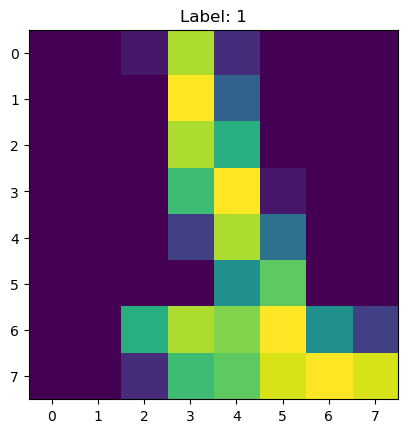

In [12]:
# 绘制数字图像
idx=1000
plt.imshow(digits.images[idx])
plt.title(f'Label: {digits.target[idx]}')
plt.show()

In [13]:
X = digits.data
y = digits.target

# 设置 KFold 参数
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5折交叉验证

# 用于存储每折的结果
results = []

# KFold 交叉验证
for train_index, test_index in kf.split(X):
    # 划分训练集和验证集
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 创建并训练模型
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # 在验证集上进行预测
    y_pred = model.predict(X_test)

    # 计算准确率
    acc = accuracy_score(y_test, y_pred)
    results.append(acc)

# 打印每折的准确率
print(f"每折的准确率: {results}")

# 计算平均准确率
print(f"平均准确率: {np.mean(results)}")

每折的准确率: [0.975, 0.9805555555555555, 0.9637883008356546, 0.9749303621169917, 0.9832869080779945]
平均准确率: 0.9755122253172391


## StratifiedKFold

- **StratifiedKFold**是KFold的一种变体，它在划分数据时保持每个子集中的类分布与整个数据集中的类分布相同，即**分层抽样**。

- StratifiedKFold特别适用于类别不平衡的问题（即某些类别的样本比其他类别的样本多得多）。StratifiedKFold确保了在训练集和验证集中，各类别样本的比例与原始数据集中的比例大致相同，从而提高了模型评估的准确性和可靠性

### StratifiedKFold流程

1. 数据划分：将数据集划分为 K 个子集（fold），每个子集中的类别分布与整个数据集的类别分布一致（分层抽样）。
2. 交替训练与验证：在每一轮中，选择一个子集作为 验证集，其余的 K-1 个子集作为 训练集。
3. 训练与评估：在训练集上训练模型，并在验证集上评估模型性能。
4. 重复 K 次：重复 K 次，确保每个子集都作为一次验证集参与评估。
5. 最终评估：计算 K 次评估结果的平均值，作为模型的 最终性能指标。

### StratifiedKFold
**n_splits：** 数据集划分的子集个数

**shuffle：** 在拆分数据集之前，是否需要随机打乱数据。

**random_state：** 随机数种子。

### StratifiedKFold实际案例

In [14]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

# 加载 Digits 手写数字识别数据集
digits = load_digits()
X = digits.data
y = digits.target

# 设置 StratifiedKFold 参数
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5折交叉验证

# 用于存储每折的结果
results = []

# StratifiedKFold 交叉验证
for train_index, test_index in skf.split(X, y):
    # 划分训练集和验证集
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 创建并训练模型
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # 在验证集上进行预测
    y_pred = model.predict(X_test)

    # 计算准确率
    acc = accuracy_score(y_test, y_pred)
    results.append(acc)

# 打印每折的准确率
print(f"每折的准确率: {results}")

# 计算平均准确率
print(f"平均准确率: {np.mean(results)}")

每折的准确率: [0.9833333333333333, 0.9805555555555555, 0.9665738161559888, 0.9832869080779945, 0.9777158774373259]
平均准确率: 0.9782930981120396
